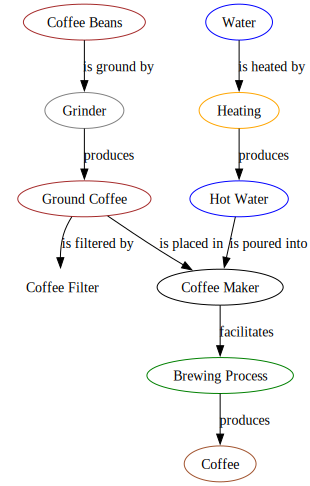

The process of brewing coffee can be visualized as a series of steps:

1. **Coffee Beans** - The process starts with whole coffee beans, which are the seeds from the coffee plant. These beans are roasted to various degrees to achieve different flavors.
   
2. **Grinder** - The coffee beans need to be ground before they can be used to brew coffee. The grinder breaks down the beans into smaller particles. The grind size can affect the brewing method and the final taste of the coffee.

3. **Ground Coffee** - The result of grinding the coffee beans is ground coffee, which is ready for brewing.

4. **Water** - Water is an essential part of the coffee brewing process. The quality and temperature of the water can significantly affect the taste of the final brew.

5. **Heating** - The water is heated to the appropriate temperature for brewing. This is usually close to boiling, but not quite boiling, as overly hot water can burn the coffee and create a bitter taste.

6. **Hot Water** - Once the water has been heated, we have hot water ready to be used in brewing the coffee.

7. **Coffee Maker** - There are various types of coffee makers, from manual methods like a French press or pour-over to automatic machines like drip coffee makers or espresso machines. Ground coffee is placed into the coffee maker.

8. **Coffee Filter** - In many brewing methods, a coffee filter is used to separate the ground coffee from the brewed coffee. Filters can be paper, metal, or cloth, depending on the brewing method.

9. **Brewing Process** - The hot water is poured over or through the ground coffee, facilitated by the coffee maker. This allows the water to extract flavors and oils from the coffee grounds.

10. **Coffee** - The final product of this process is brewed coffee, which can be served as is or with milk, sugar, and other flavorings as desired.

Each step is critical to the overall flavor and quality of the final cup of coffee. Brewing coffee is both an art and a science that involves carefully balancing grind size, water temperature, and extraction time to create the perfect cup.

In [6]:
from graphviz import Digraph
from pydantic import BaseModel, Field
from typing import List
from chatlab import Chat, system

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)

def visualize_knowledge_graph(kg: KnowledgeGraph, comment: str = "Knowledge Graph"):
    """Visualizes a knowledge graph using graphviz."""
    if isinstance(kg, dict):
        kg = KnowledgeGraph(**kg)

    dot = Digraph(comment=comment)

    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    display(dot)

    return "<<Graphic displayed inline for the user to see>>"


chat = Chat(
    system("You are running inside a jupyter notebook. Your responses appear as markdown in the notebook. Functions you run can produce side effects."),
    model="gpt-4-1106-preview",
    chat_functions=[visualize_knowledge_graph]
)

await chat(
    "Visually teach me about the process of brewing coffee.",
    temperature=0.9
)

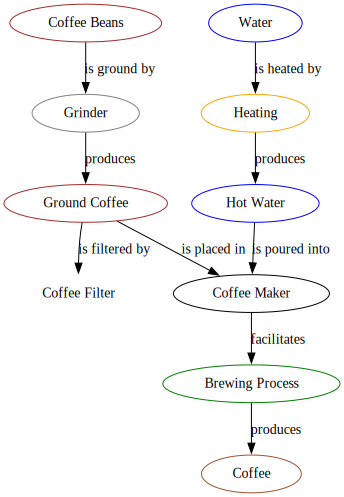

Here's a more "jazzed up" version of the coffee brewing process, complete with fun emojis to represent each step:

1. **🌱 Coffee Beans** - The journey begins with the aromatic coffee beans, the essence of potential for a delightful cup of coffee.

2. **🌀 Grinder** - The beans meet their fate in the grinder, transforming from solid beans to a more malleable ground coffee, ready for extraction.

3. **☕ Ground Coffee** - The freshly ground coffee, now bursting with potential, awaits the alchemy that will turn it into a liquid treasure.

4. **💧 Water** - The humble water, soon to become the elixir of life for coffee lovers, is prepared for its transformation.

5. **🔥 Heating** - The water is heated, energy infusing into it until it's just the right temperature to coax the flavors from the coffee grounds.

6. **🌡️ Hot Water** - The water, now hot and eager, is on the brink of fulfilling its destiny in the coffee maker.

7. **💻 Coffee Maker** - The coffee maker, a stage for the magic to happen, where ground coffee and hot water will perform their dance.

8. **🎩 Brewing Process** - The brewing process is where the magic happens, a symphony of temperature, time, and turbulence that extracts the soul of the coffee into a cup.

9. **📄 Coffee Filter** - The coffee filter, a silent sentinel, ensures that only the pure essence of coffee makes it through, leaving the spent grounds behind.

10. **🎉 Coffee** - The final act, a cup of coffee, a celebration of flavor, a testament to the journey from bean to cup, ready to be savored and enjoyed.

This visual representation captures the art and excitement of brewing coffee, each step a critical note in the composition of the perfect cup.

In [7]:
await chat("Jazz it up a bit.")